In [31]:
import os
import sys
from dotenv import load_dotenv

notebook_path = os.getcwd()

# One level up from the notebook
PROJECT_ROOT = os.path.abspath(os.path.join(notebook_path, "../"))

DATA_ROOT = os.path.join(PROJECT_ROOT, "data")

sys.path.insert(1, PROJECT_ROOT)
load_dotenv()

True

In [32]:
import glob

import databento as db
import pandas as pd
import numpy as np
import datetime

import plotly.graph_objects as go

Download from Databento (Magnificent 7, OHLCV-1min)

Remark: FB was changed to META on June 9, 2022.

In [127]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["FB"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2023-01-01 00:00:00 2024-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



2024-01-01 00:00:00 2025-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



In [59]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "META", "NVDA", "TSLA"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2023-01-01 00:00:00 2024-01-01 00:00:00
2024-01-01 00:00:00 2025-01-01 00:00:00


# Read

Aggregate 1 min data into whatever time frame.(sample operation)

In [3]:
symbol = "AAPL"
date   = "2019-01-02"

df = pd.read_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}_ohlcv-1m_{date}.csv"), index_col=0)
df.index = pd.to_datetime(df.index)

In [7]:
timeframe = "1h"
resampled_df = df.resample(timeframe).agg(
                    {
                        'open': 'first',
                        'high': 'max',
                        'low': 'min',
                        'close': 'last',
                        'volume': 'sum',
                    }
                )

<Axes: xlabel='ts_event'>

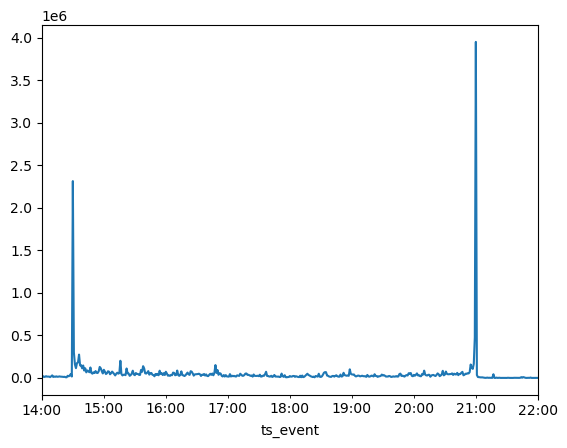

In [24]:
df.loc['2019-01-03 14:00': '2019-01-03 22:00', 'volume'].plot()

combine multiple symbols

In [128]:
def read_df_with_prefix(directory, prefix):
    tmp = []

    for filename in glob.glob(os.path.join(directory, f"{prefix}*")):
        tmp.append(pd.read_csv(filename, index_col=0))

    return pd.concat(tmp, axis=0)

# # Example usage:
# symbol = "AAPL"

# directory = os.path.join(DATA_ROOT, "databento")
# prefix = f"{symbol}_ohlcv-1m_"

# df = read_df_with_prefix(directory, prefix)
# df.index = pd.to_datetime(df.index)

In [195]:
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "NVDA", "TSLA"] # dropped META because of FB-META change.
tmp = []

for symbol in symbols:
    directory = os.path.join(DATA_ROOT, "databento")
    prefix = f"{symbol}_ohlcv-1m_"

    tmpdf = read_df_with_prefix(directory, prefix)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmp.append(tmpdf)

df = pd.concat(tmp, axis=1)

In [199]:
# deal with META separately...
tmp = []
for fname in glob.glob(os.path.join(directory, "FB_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

fb_df = pd.concat(tmp, axis=0)
fb_df = fb_df.loc[:'2022-06-09']

tmp = []
for fname in glob.glob(os.path.join(directory, "META_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

meta_df = pd.concat(tmp, axis=0)
meta_df = meta_df.loc['2022-06-09':]

meta_df = pd.concat([fb_df, meta_df], axis=0)
meta_df.columns = [f"META_{x}" for x in meta_df.columns]

In [200]:
# merge back
df = pd.concat([df, meta_df], axis=1)

<Axes: xlabel='ts_event'>

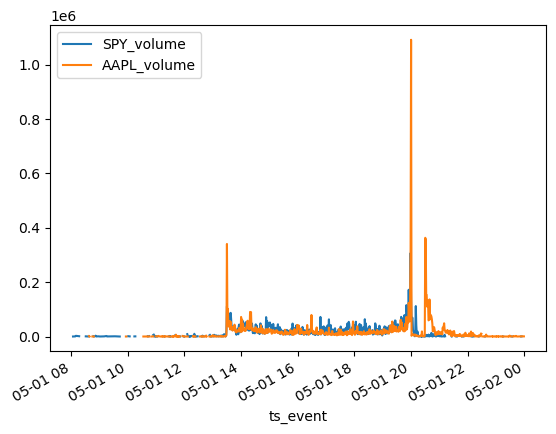

In [144]:
df.loc['2018-05-01':'2018-05-01', ['SPY_volume', 'AAPL_volume']].plot()

In [273]:
resampled_df

SPY_open  SPY_high  SPY_low  SPY_close  SPY_volume  \
ts_event                                                                        
2018-05-01 00:00:00+00:00   263.520    265.52   262.11     265.15   9612444.0   
2018-05-02 00:00:00+00:00   264.270    265.68   262.36     262.45  10234741.0   
2018-05-03 00:00:00+00:00   260.475    263.36   259.05     262.95  19136331.0   
2018-05-04 00:00:00+00:00   263.760    266.78   263.63     266.18  10718099.0   
2018-05-07 00:00:00+00:00   267.410    268.02   266.11     266.75   7173030.0   
...                             ...       ...      ...        ...         ...   
2024-12-24 00:00:00+00:00   596.060    602.20   595.47     601.06   3587239.0   
2024-12-26 00:00:00+00:00   599.460    602.48   598.09     601.24   3357937.0   
2024-12-27 00:00:00+00:00   597.470    597.76   590.77     595.20   6896726.0   
2024-12-30 00:00:00+00:00   587.960    591.73   584.42     587.99   5605529.0   
2024-12-31 00:00:00+00:00   589.940    590.63   584.42     586.18   7164659.0   

                           AAPL_open  AAPL_high  AAPL_low  AAPL_close  \
ts_event                                                                
2018-05-01 00:00:00+00:00    167.755     178.00    166.50      175.06   
2018-05-02 00:00:00+00:00    176.140     177.75    175.22      176.42   
2018-05-03 00:00:00+00:00    175.780     177.50    174.46      177.04   
2018-05-04 00:00:00+00:00    182.970     184.25    182.52      183.90   
2018-05-07 00:00:00+00:00    187.370     187.66    184.75      185.02   
...                              ...        ...       ...         ...   
2024-12-24 00:00:00+00:00    255.480     258.36    255.29      257.84   
2024-12-26 00:00:00+00:00    258.190     260.09    257.63      259.10   
2024-12-27 00:00:00+00:00    257.840     258.70    253.06      255.85   
2024-12-30 00:00:00+00:00    252.220     253.50    250.76      252.17   
2024-12-31 00:00:00+00:00    252.470     253.25    249.44      250.42   

                           AAPL_volume  ...  TSLA_open  TSLA_high  TSLA_low  \
ts_event                                ...                                   
2018-05-01 00:00:00+00:00   10010395.0  ...     297.42     301.02    293.40   
2018-05-02 00:00:00+00:00   10087147.0  ...     299.81     311.64    298.00   
2018-05-03 00:00:00+00:00    7665886.0  ...     282.48     286.00    275.25   
2018-05-04 00:00:00+00:00    9711912.0  ...     288.69     296.79    285.29   
2018-05-07 00:00:00+00:00    6562690.0  ...     299.63     305.95    299.21   
...                                ...  ...        ...        ...       ...   
2024-12-24 00:00:00+00:00    6938715.0  ...     435.83     466.49    435.14   
2024-12-26 00:00:00+00:00    9028441.0  ...     465.02     465.27    451.02   
2024-12-27 00:00:00+00:00   17585064.0  ...     449.27     449.89    426.49   
2024-12-30 00:00:00+00:00   12561349.0  ...     419.40     426.99    415.75   
2024-12-31 00:00:00+00:00   14453169.0  ...     424.06     427.95    402.55   

                           TSLA_close  TSLA_volume  META_open  META_high  \
ts_event                                                                   
2018-05-01 00:00:00+00:00      300.82    1242352.0     172.42     174.78   
2018-05-02 00:00:00+00:00      301.85    1965089.0     176.38     178.09   
2018-05-03 00:00:00+00:00      283.95    2923014.0     173.89     175.73   
2018-05-04 00:00:00+00:00      293.81    1749153.0     176.14     176.98   
2018-05-07 00:00:00+00:00      302.30    1827504.0     179.03     179.35   
...                               ...          ...        ...        ...   
2024-12-24 00:00:00+00:00      464.90   12896896.0     602.21     608.22   
2024-12-26 00:00:00+00:00      454.03   12195168.0     605.85     606.41   
2024-12-27 00:00:00+00:00      431.81   18079141.0     599.40     601.77   
2024-12-30 00:00:00+00:00      417.50   11861649.0     588.51     596.96   
2024-12-31 00:00:00+00:00      403.47   13822304.0     592.57     593.99   

      

In [354]:
tmp = []
for symbol in (symbols+['META']):
    tmpdf = pd.read_csv(os.path.join(DATA_ROOT, f"{symbol}.O.csv"), index_col=0)
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmpdf.index = pd.to_datetime(tmpdf.index, utc=True)
    tmp.append(tmpdf)

yf_df = pd.concat(tmp, axis=1)

calculate adjust factor for adjusted factor with yfinance data...

In [355]:
yf_df = yf_df.loc['2018-05-01':'2024-12-31',["SPY_ADJ_CLOSE","AAPL_CLOSE","MSFT_CLOSE",'AMZN_CLOSE','GOOG_CLOSE','NVDA_CLOSE','TSLA_CLOSE','META_CLOSE']]
yf_df = yf_df.rename(columns={"SPY_ADJ_CLOSE": "SPY_CLOSE"})
yf_df = yf_df.ffill()

In [356]:
yf_df

SPY_CLOSE  AAPL_CLOSE  MSFT_CLOSE  AMZN_CLOSE  \
2018-05-01 00:00:00+00:00  237.557266         NaN         NaN         NaN   
2018-05-02 00:00:00+00:00  235.961380   41.707637   87.044921    78.48400   
2018-05-03 00:00:00+00:00  235.441498   41.783225   87.566204    78.60375   
2018-05-04 00:00:00+00:00  238.489563   43.422524   88.580844    79.04750   
2018-05-07 00:00:00+00:00  239.296494   43.736683   89.567558    80.00700   
...                               ...         ...         ...         ...   
2024-12-25 00:00:00+00:00  601.299988  258.200000  439.330000   229.05000   
2024-12-26 00:00:00+00:00  601.340027  259.020000  438.110000   227.05000   
2024-12-27 00:00:00+00:00  595.010010  255.590000  430.530000   223.75000   
2024-12-30 00:00:00+00:00  588.219971  252.200000  424.830000   221.30000   
2024-12-31 00:00:00+00:00  586.080017  250.420000  421.500000   219.39000   

                           GOOG_CLOSE  NVDA_CLOSE  TSLA_CLOSE  META_CLOSE  
2018-05-01 00:00:00+00:00         NaN         NaN         NaN         NaN  
2018-05-02 00:00:00+00:00   51.035621    5.600075   20.076669  175.399982  
2018-05-03 00:00:00+00:00   51.002739    5.765372   18.963336  173.357783  
2018-05-04 00:00:00+00:00   52.222855    5.915575   19.606002  175.937927  
2018-05-07 00:00:00+00:00   52.550677    6.153624   20.184669  177.292752  
...                               ...         ...         ...         ...  
2024-12-25 00:00:00+00:00  197.570000  140.220000  462.280000  607.750000  
2024-12-26 00:00:00+00:00  197.100000  139.930000  454.130000  603.350000  
2024-12-27 00:00:00+00:00  194.040000  137.010000  431.660000  599.810000  
2024-12-30 00:00:00+00:00  192.690000  137.490000  417.410000  591.240000  
2024-12-31 00:00:00+00:00  190.440000  134.290000  403.840000  585.510000  

[1735 rows x 8 columns]

In [357]:
resampled_df[[f"{x}_close" for x in (symbols+['META'])]]

SPY_close  AAPL_close  MSFT_close  AMZN_close  \
ts_event                                                                   
2018-05-01 00:00:00+00:00     265.15      175.06       95.35     1585.15   
2018-05-02 00:00:00+00:00     262.45      176.42       93.11     1568.00   
2018-05-03 00:00:00+00:00     262.95      177.04       94.30     1573.00   
2018-05-04 00:00:00+00:00     266.18      183.90       95.32     1580.50   
2018-05-07 00:00:00+00:00     266.75      185.02       96.30     1599.01   
...                              ...         ...         ...         ...   
2024-12-24 00:00:00+00:00     601.06      257.84      439.11      228.80   
2024-12-26 00:00:00+00:00     601.24      259.10      438.30      227.02   
2024-12-27 00:00:00+00:00     595.20      255.85      430.50      224.16   
2024-12-30 00:00:00+00:00     587.99      252.17      424.70      221.29   
2024-12-31 00:00:00+00:00     586.18      250.42      421.51      219.40   

                           GOOG_close  NVDA_close  TSLA_close  META_close  
ts_event                                                                   
2018-05-01 00:00:00+00:00     1037.81      228.30      300.82      174.40  
2018-05-02 00:00:00+00:00     1023.00      225.56      301.85      175.97  
2018-05-03 00:00:00+00:00     1026.00      233.37      283.95      174.22  
2018-05-04 00:00:00+00:00     1047.77      239.20      293.81      176.72  
2018-05-07 00:00:00+00:00     1054.79      248.97      302.30      177.86  
...                               ...         ...         ...         ...  
2024-12-24 00:00:00+00:00      197.51      139.61      464.90      607.75  
2024-12-26 00:00:00+00:00      197.14      139.78      454.03      603.39  
2024-12-27 00:00:00+00:00      194.44      137.10      431.81      599.98  
2024-12-30 00:00:00+00:00      192.48      137.39      417.50      590.88  
2024-12-31 00:00:00+00:00      190.47      134.50      403.47      586.00  

[1679 rows x 8 columns]

<Axes: xlabel='ts_event'>

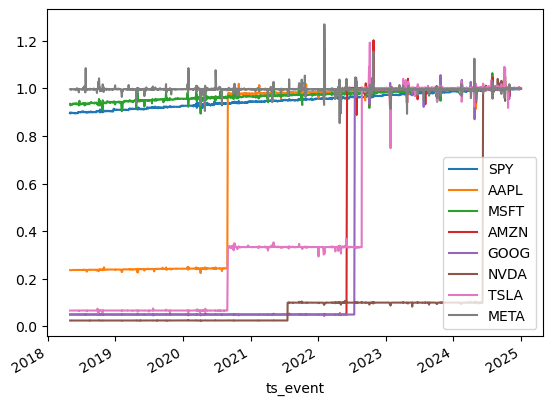

In [358]:
factor_df = pd.DataFrame(index=resampled_df.index)

for symbol in (symbols+['META']):
    factor_df[symbol] = yf_df.loc['2018-05-01':'2024-12-31',f"{symbol}_CLOSE"] / resampled_df[f'{symbol}_close']

factor_df = factor_df.ffill()
# factor_df.to_csv(os.path.join(DATA_ROOT, "offset_factor", "offset_factor.csv"))
factor_df.plot()

(one) multiple periods of beta, one symbol.

In [361]:
import statsmodels.formula.api as sm

TARGET = "TSLA"

# Calculate daily returns for AAPL and SPY
resampled_df[f"{TARGET}_returns"] = (resampled_df[f"{TARGET}_close"] * factor_df[TARGET]) / (resampled_df[f"{TARGET}_close"].shift(1) * factor_df[TARGET].shift(1)) - 1
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1

# Define the rolling window sizes
window_sizes = [20, 60, 120]

# Create an empty dictionary to store the betas for each window size
betas = {window_size: [] for window_size in window_sizes}

# Iterate over the DataFrame with rolling windows
for window_size in window_sizes:
    for i in range(window_size, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - window_size: i]

        # Perform the regression
        result = sm.ols(f"SPY_returns ~ {TARGET}_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        beta = result.params[f"{TARGET}_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[window_size].append(beta)
    
    betas[window_size] = [np.nan] * (window_size - min(window_sizes)) + betas[window_size]

# Create a new DataFrame with the betas for each window size
beta_resampled_df = pd.DataFrame({
        f"beta_{window_size}": betas[window_size]
        for window_size in window_sizes
    },
    index=resampled_df.index[min(window_sizes):],  # Adjust index for the largest window
)

In [362]:
# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_resampled_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_resampled_df.index,
            y=beta_resampled_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"{TARGET} Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [363]:
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1

betas = {target: [] for target in (symbols + ['META'])}

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = (resampled_df[f"{target}_close"] * factor_df[target]) / (resampled_df[f"{target}_close"].shift(1) * factor_df[target].shift(1)) - 1

    # Perform the regression
    # result = sm.ols(f"SPY_returns ~ {target}_returns", data=resampled_df).fit()
    result = sm.ols(f"{target}_returns ~ SPY_returns", data=resampled_df).fit()

    # Get the beta coefficient
    # beta = result.params[f"{target}_returns"]
    beta = result.params["SPY_returns"]

    # Append the beta to the corresponding list in the dictionary
    betas[target].append(beta)

In [364]:
betas

{'SPY': [1.0000000000000013],
 'AAPL': [1.1203459745376707],
 'MSFT': [1.1179528338624394],
 'AMZN': [1.078537442007364],
 'GOOG': [1.062847891176193],
 'NVDA': [1.680812930449628],
 'TSLA': [1.4389418263875058],
 'META': [1.1847612120804083]}

In [365]:
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1
betas = {target: [] for target in (symbols + ['META'])}

WINDOW_SIZE = 60

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = (resampled_df[f"{target}_close"] * factor_df[target]) / (resampled_df[f"{target}_close"].shift(1) * factor_df[target].shift(1)) - 1

    # Iterate over the DataFrame with rolling windows
    for i in range(WINDOW_SIZE, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - WINDOW_SIZE: i]

        # Perform the regression
        result = sm.ols(f"{target}_returns ~ SPY_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        # beta = result.params[f"{target}_returns"]
        beta = result.params["SPY_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[target].append(beta)

<Axes: >

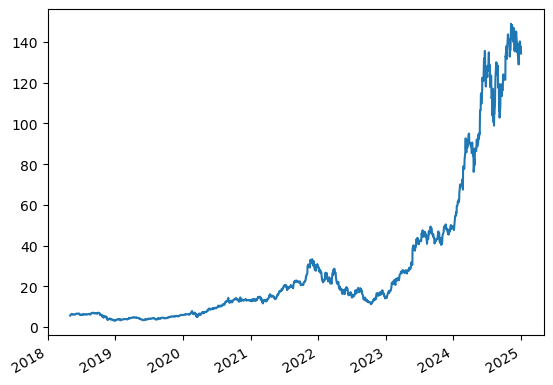

In [366]:
yf_df['NVDA_CLOSE'].plot()

In [367]:
yf_df.loc['2024-06':'2024-06', 'NVDA_CLOSE']

2024-06-03 00:00:00+00:00    114.972797
2024-06-04 00:00:00+00:00    116.409457
2024-06-05 00:00:00+00:00    122.411037
2024-06-06 00:00:00+00:00    120.969378
2024-06-07 00:00:00+00:00    120.859404
2024-06-10 00:00:00+00:00    120.859404
2024-06-11 00:00:00+00:00    120.891331
2024-06-12 00:00:00+00:00    125.180669
2024-06-13 00:00:00+00:00    129.589988
2024-06-14 00:00:00+00:00    131.859637
2024-06-17 00:00:00+00:00    130.959776
2024-06-18 00:00:00+00:00    135.559066
2024-06-19 00:00:00+00:00    135.559066
2024-06-20 00:00:00+00:00    130.759807
2024-06-21 00:00:00+00:00    126.550457
2024-06-24 00:00:00+00:00    118.091763
2024-06-25 00:00:00+00:00    126.070531
2024-06-26 00:00:00+00:00    126.380483
2024-06-27 00:00:00+00:00    123.970856
2024-06-28 00:00:00+00:00    123.520925
Name: NVDA_CLOSE, dtype: float64

In [368]:
yf_df.loc['2024-06':'2024-06', 'NVDA_CLOSE'] / resampled_df.loc['2024-06':'2024-06', 'NVDA_close']

2024-06-03 00:00:00+00:00    0.099518
2024-06-04 00:00:00+00:00    0.100146
2024-06-05 00:00:00+00:00    0.099408
2024-06-06 00:00:00+00:00    0.100265
2024-06-07 00:00:00+00:00    0.100079
2024-06-10 00:00:00+00:00    0.992522
2024-06-11 00:00:00+00:00    1.001005
2024-06-12 00:00:00+00:00    0.990353
2024-06-13 00:00:00+00:00    0.999768
2024-06-14 00:00:00+00:00    0.999088
2024-06-17 00:00:00+00:00    0.999312
2024-06-18 00:00:00+00:00    0.995002
2024-06-19 00:00:00+00:00         NaN
2024-06-20 00:00:00+00:00    1.000534
2024-06-21 00:00:00+00:00    0.996460
2024-06-24 00:00:00+00:00    1.010800
2024-06-25 00:00:00+00:00    0.992056
2024-06-26 00:00:00+00:00    1.011287
2024-06-27 00:00:00+00:00    0.999926
2024-06-28 00:00:00+00:00    0.997907
dtype: float64

In [369]:
resampled_df.loc['2024-06':'2024-06', 'NVDA_close']

ts_event
2024-06-03 00:00:00+00:00    1155.30
2024-06-04 00:00:00+00:00    1162.40
2024-06-05 00:00:00+00:00    1231.40
2024-06-06 00:00:00+00:00    1206.50
2024-06-07 00:00:00+00:00    1207.64
2024-06-10 00:00:00+00:00     121.77
2024-06-11 00:00:00+00:00     120.77
2024-06-12 00:00:00+00:00     126.40
2024-06-13 00:00:00+00:00     129.62
2024-06-14 00:00:00+00:00     131.98
2024-06-17 00:00:00+00:00     131.05
2024-06-18 00:00:00+00:00     136.24
2024-06-20 00:00:00+00:00     130.69
2024-06-21 00:00:00+00:00     127.00
2024-06-24 00:00:00+00:00     116.83
2024-06-25 00:00:00+00:00     127.08
2024-06-26 00:00:00+00:00     124.97
2024-06-27 00:00:00+00:00     123.98
2024-06-28 00:00:00+00:00     123.78
Name: NVDA_close, dtype: float64

<Axes: xlabel='ts_event'>

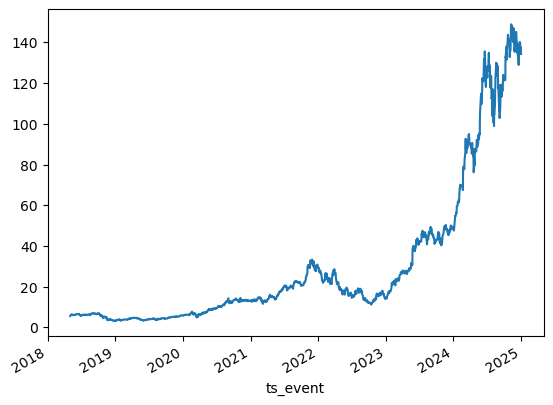

In [372]:
(resampled_df[f"NVDA_close"] * factor_df["NVDA"]).plot()

In [373]:
# Create a new DataFrame with the betas for each window size
beta_df = pd.DataFrame({
        f"beta_{target}": betas[target]
        for target in (symbols + ['META'])
    },
    index=resampled_df.index[WINDOW_SIZE:],  # Adjust index for the largest window
)

# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_df.index,
            y=beta_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Options Data

In [1]:
import databento as db
import pandas as pd
import numpy as np
import re

In [2]:
client = db.Historical("db-gKxSspWPxT3CPieK4p9k4hbKfDupW")

download publisher from DataBento

In [ ]:
publishers = client.metadata.list_publishers()

In [14]:
df = pd.DataFrame(publishers)
df.to_csv(os.path.join(DATA_ROOT, "databento", "list_publishers.csv"))

Download options OHLCV 1d data from DataBento

In [34]:
for symbol in ['AMZN', 'GOOG', 'META', 'NVDA', 'TSLA', 'MSFT']:
    data = client.timeseries.get_range(
        dataset="OPRA.PILLAR",
        schema="ohlcv-1d",
        stype_in="parent",
        symbols=["AAPL.OPT"],
        start="2023-03-28T00:00",
        end="2025-01-30T00:00"
    )

    df = data.to_df()

    pattern = r'([A-Z]+)  (\d{6})([PC])(\d+)'
    df[['symbol_base', 'expiry_date', 'type', 'strike']] = df['symbol'].str.extract(pattern)

    df['expiry_date'] = pd.to_datetime("20" + df['expiry_date'], format='%Y%m%d', utc=True)

    df['strike'] = df['strike'].str[:5] + '.' + df['strike'].str[5:]
    df['strike'] = df['strike'].astype(float)

    df = df.drop(columns=['symbol'])

    df.to_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}-options-ohlcv-1d.csv"))

C:\Users\Austin\AppData\Local\Temp\ipykernel_66624\496454316.py:2: BentoWarning: The streaming request contained one or more days which have reduced quality: 2023-05-03 (degraded), 2023-05-08 (degraded), 2023-06-02 (degraded)... See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(
C:\Users\Austin\AppData\Local\Temp\ipykernel_66624\496454316.py:2: BentoWarning: The streaming request contained one or more days which have reduced quality: 2023-05-03 (degraded), 2023-05-08 (degraded), 2023-06-02 (degraded)... See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(
C:\Users\Austin\AppData\Local\Temp\ipykernel_66624\496454316.py:2: BentoWarning: The streaming request contained one or more days which have reduced quality: 2023-05-03 (degraded), 2023-05-08 (degraded), 2023-06-02 (degraded)... See: https://databento.com/docs/api-referen

Load saved Options price OHLCV and aggregate

In [46]:
symbol = "AAPL"
df = pd.read_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}-options-ohlcv-1d.csv"), index_col=0)

In [98]:
df.index = pd.to_datetime(df.index, utc=True)
df['expiry_date'] = pd.to_datetime(df['expiry_date'], utc=True)

Load saved Stock price OHLCV and aggregate

In [122]:
def read_df_with_prefix(directory, prefix):
    tmp = []

    for filename in glob.glob(os.path.join(directory, f"{prefix}*")):
        tmp.append(pd.read_csv(filename, index_col=0))

    return pd.concat(tmp, axis=0)

symbol = "AAPL"
timeframe = "1d"

directory = os.path.join(DATA_ROOT, "databento")
prefix = f"{symbol}_ohlcv-1m_"

stock_df = read_df_with_prefix(directory, prefix)
stock_df.index = pd.to_datetime(stock_df.index)
stock_df = stock_df[['open','high','low','close','volume']]

start_time = '14:30'
end_time = '21:00'

agg_methods = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
}

tmp = stock_df.resample("1d").agg(agg_methods)
tmp = tmp.dropna() # non-trading days are na
trading_days = tmp.index

resampled_stock_df = stock_df.between_time(start_time, end_time).resample(timeframe).agg(agg_methods)
# aggregation creates non-trading dates. line below eliminates them.
resampled_stock_df = resampled_stock_df.loc[resampled_stock_df.index.strftime("%Y-%m-%d").isin(trading_days.strftime("%Y-%m-%d"))]

In [124]:
resampled_stock_df.head(8)firsts = df1.index.get_level_values('first')
df1['value2'] = df2.loc[firsts].values

open     high     low   close    volume
ts_event                                                             
2018-05-01 00:00:00+00:00  167.755  178.000  166.50  175.06  10010395
2018-05-02 00:00:00+00:00  176.140  177.750  175.22  176.42  10087147
2018-05-03 00:00:00+00:00  175.780  177.500  174.46  177.04   7665886
2018-05-04 00:00:00+00:00  182.970  184.250  182.52  183.90   9711912
2018-05-07 00:00:00+00:00  187.370  187.660  184.75  185.02   6562690
2018-05-08 00:00:00+00:00  184.950  186.220  184.46  186.00   5750992
2018-05-09 00:00:00+00:00  185.510  187.500  185.22  187.38   5308372
2018-05-10 00:00:00+00:00  188.600  190.365  188.35  189.59   5295023

for option data aggregation below, may consider volume weighted mean for OHLC. but simple mean for now...

note: option need agg b/c even for one symbol, there are multiple data sources (see publisher csv)

In [101]:
agg_df = df[['type', 'strike', 'expiry_date', 'open', 'high', 'low', 'close', 'volume']].groupby(
    ['ts_event', 'type', 'strike', 'expiry_date']).agg({
        'open': 'mean',
        'high': 'mean',
        'low': 'mean',
        'close': 'mean',
        'volume': 'sum'
    })

tmp = []
for mi in agg_df.index:
    tmp.append(mi[3]-mi[0])

agg_df['time_to_expiry'] = tmp

In [133]:
agg_df = agg_df[:'2024-12-31']

merge stock price into option `agg_df`

In [134]:
firsts = agg_df.index.get_level_values('ts_event')
firsts

DatetimeIndex(['2023-03-28 00:00:00+00:00', '2023-03-28 00:00:00+00:00',
               '2023-03-28 00:00:00+00:00', '2023-03-28 00:00:00+00:00',
               '2023-03-28 00:00:00+00:00', '2023-03-28 00:00:00+00:00',
               '2023-03-28 00:00:00+00:00', '2023-03-28 00:00:00+00:00',
               '2023-03-28 00:00:00+00:00', '2023-03-28 00:00:00+00:00',
               ...
               '2024-12-31 00:00:00+00:00', '2024-12-31 00:00:00+00:00',
               '2024-12-31 00:00:00+00:00', '2024-12-31 00:00:00+00:00',
               '2024-12-31 00:00:00+00:00', '2024-12-31 00:00:00+00:00',
               '2024-12-31 00:00:00+00:00', '2024-12-31 00:00:00+00:00',
               '2024-12-31 00:00:00+00:00', '2024-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='ts_event', length=462275, freq=None)

In [141]:
firsts = agg_df.index.get_level_values('ts_event')
agg_df['stock_close'] = resampled_stock_df.loc[firsts, 'close'].values

C:\Users\Austin\AppData\Local\Temp\ipykernel_66624\3280253230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['stock_close'] = resampled_stock_df.loc[firsts, 'close'].values


In [145]:
agg_df.head(20)

open  \
ts_event                  type strike expiry_date                           
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00  107.3000   
                                      2023-04-21 00:00:00+00:00  106.3375   
                                      2024-01-19 00:00:00+00:00  108.4050   
                                      2025-01-17 00:00:00+00:00  109.3250   
                                      2025-12-19 00:00:00+00:00  110.9500   
                               55.0   2023-04-06 00:00:00+00:00  102.0500   
                               60.0   2023-03-31 00:00:00+00:00   97.3000   
                               65.0   2023-04-21 00:00:00+00:00   91.4500   
                               70.0   2023-04-06 00:00:00+00:00   86.6000   
                                      2023-04-21 00:00:00+00:00   87.4000   
                                      2024-01-19 00:00:00+00:00   89.5500   
                                      2025-06-20 00:00:00+00:00   93.0200   
                               80.0   2023-06-16 00:00:00+00:00   77.4700   
                                      2024-06-21 00:00:00+00:00   81.4700   
                               85.0   2023-06-16 00:00:00+00:00   73.8500   
                                      2023-07-21 00:00:00+00:00   74.3200   
                               90.0   2023-06-16 00:00:00+00:00   67.1000   
                                      2023-12-15 00:00:00+00:00   70.2500   
                                      2024-01-19 00:00:00+00:00   70.8100   
                                      2025-01-17 00:00:00+00:00   75.9000   

                                                                     high  \
ts_event                  type strike expiry_date                           
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00  107.3000   
                                      2023-04-21 00:00:00+00:00  106.3375   
                                      2024-01-19 00:00:00+00:00  108.4050   
                                      2025-01-17 00:00:00+00:00  109.3250   
                                      2025-12-19 00:00:00+00:00  110.9500   
                               55.0   2023-04-06 00:00:00+00:00  102.0500   
                               60.0   2023-03-31 00:00:00+00:00   97.3000   
                               65.0   2023-04-21 00:00:00+00:00   91.4500   
                               70.0   2023-04-06 00:00:00+00:00   86.6000   
                                      2023-04-21 00:00:00+00:00   87.4000   
                                      2024-01-19 00:00:00+00:00   89.5500   
                                      2025-06-20 00:00:00+00:00   93.0200   
                               80.0   2023-06-16 00:00:00+00:00   77.4700   
                                      2024-06-21 00:00:00+00:00   81.4700   
                               85.0   2023-06-16 00:00:00+00:00   73.8500   
                                      2023-07-21 00:00:00+00:00   74.3200   
                               90.0   2023-06-16 00:00:00+00:00   67.1600   
                                      2023-12-15 00:00:00+00:00   70.2500   
                                      2024-01-19 00:00:00+00:00   70.8100   
                                      2025-01-17 00:00:00+00:00   75.9100   

                                                                     low  \
ts_event                  type strike expiry_date                          
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00  107.300   
                                      2023-04-21 00:00:00+00:00  106.275   
                                      2024-01-19 00:00:00+00:00  108.405   
                                      2025-01-17 00:00:00+00:00  109.325   
                                      2025-12-19 00:00:00+00:00  110.950   
                               55.0   2023-04-06 00:00:00+00:00  102.050   
                               60.0   2023-03-31 00:00:00+00:00   97.30

In [ ]:
agg_df[['close', 'stock_close', 'time_to_expiry']].head(20).rename(columns={'close': 'option_close'})W

option_close  \
ts_event                  type strike expiry_date                               
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00       107.300   
                                      2023-04-21 00:00:00+00:00       106.275   
                                      2024-01-19 00:00:00+00:00       108.405   
                                      2025-01-17 00:00:00+00:00       109.325   
                                      2025-12-19 00:00:00+00:00       110.950   
                               55.0   2023-04-06 00:00:00+00:00       102.050   
                               60.0   2023-03-31 00:00:00+00:00        97.300   
                               65.0   2023-04-21 00:00:00+00:00        91.450   
                               70.0   2023-04-06 00:00:00+00:00        86.600   
                                      2023-04-21 00:00:00+00:00        87.100   
                                      2024-01-19 00:00:00+00:00        89.400   
                                      2025-06-20 00:00:00+00:00        92.880   
                               80.0   2023-06-16 00:00:00+00:00        77.470   
                                      2024-06-21 00:00:00+00:00        81.470   
                               85.0   2023-06-16 00:00:00+00:00        73.850   
                                      2023-07-21 00:00:00+00:00        73.100   
                               90.0   2023-06-16 00:00:00+00:00        67.160   
                                      2023-12-15 00:00:00+00:00        70.250   
                                      2024-01-19 00:00:00+00:00        70.810   
                                      2025-01-17 00:00:00+00:00        75.910   

                                                                 stock_close  \
ts_event                  type strike expiry_date                              
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00       157.63   
                                      2023-04-21 00:00:00+00:00       157.63   
                                      2024-01-19 00:00:00+00:00       157.63   
                                      2025-01-17 00:00:00+00:00       157.63   
                                      2025-12-19 00:00:00+00:00       157.63   
                               55.0   2023-04-06 00:00:00+00:00       157.63   
                               60.0   2023-03-31 00:00:00+00:00       157.63   
                               65.0   2023-04-21 00:00:00+00:00       157.63   
                               70.0   2023-04-06 00:00:00+00:00       157.63   
                                      2023-04-21 00:00:00+00:00       157.63   
                                      2024-01-19 00:00:00+00:00       157.63   
                                      2025-06-20 00:00:00+00:00       157.63   
                               80.0   2023-06-16 00:00:00+00:00       157.63   
                                      2024-06-21 00:00:00+00:00       157.63   
                               85.0   2023-06-16 00:00:00+00:00       157.63   
                                      2023-07-21 00:00:00+00:00       157.63   
                               90.0   2023-06-16 00:00:00+00:00       157.63   
                                      2023-12-15 00:00:00+00:00       157.63   
                                      2024-01-19 00:00:00+00:00       157.63   
                                      2025-01-17 00:00:00+00:00       157.63   

                                                                time_to_expiry  
ts_event                  type strike expiry_date                               
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00         3 days  
                                      2023-04-21 00:00:00+00:00        24 days  
                                      2024-01-19 00:00:00+00:00       297 days  
                                      2025-01-17 00:00:00+00:00       661 days  
                                   

In [148]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def black_scholes(S, K, T, r, v, type="C"):
    """Black-Scholes option pricing model."""
    d1 = (np.log(S / K) + (r + 0.5 * v**2) * T) / (v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    if type == "C":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif type == "P":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

def black_scholes_vega(S, K, T, r, v):
    """Vega of the Black-Scholes option pricing model."""
    d1 = (np.log(S / K) + (r + 0.5 * v**2) * T) / (v * np.sqrt(T))
    return S * np.sqrt(T) * norm.pdf(d1)

def implied_volatility_newton_raphson(S, K, T, r, market_price, type="C", tolerance=1e-6, max_iterations=100):
    """
    Calculates implied volatility using the Newton-Raphson method.
    """
    v = 0.5  # Initial guess for volatility (you can adjust)
    for _ in range(max_iterations):
        price = black_scholes(S, K, T, r, v, type)
        vega = black_scholes_vega(S, K, T, r, v)

        diff = market_price - price
        if abs(diff) < tolerance:
            return v

        if vega == 0:  # Handle the case where vega is zero (can cause division by zero)
            v += 0.0001  # A small increment
            continue  # Go to the next iteration

        v = v + diff / vega  # Newton-Raphson update

        if v <= 0:  # Volatility cannot be negative
            v = 0.0001  # Or another small positive value

    return np.nan  # Return NaN if convergence is not achieved within max_iterations

In [149]:
agg_df = agg_df[['close', 'stock_close', 'time_to_expiry']]
agg_df['time_to_expiry'] = agg_df['time_to_expiry'].apply(lambda x: x.days/365) # convert to years

In [162]:
agg_df

close  \
ts_event                  type strike expiry_date                          
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00  107.300   
                                      2023-04-21 00:00:00+00:00  106.275   
                                      2024-01-19 00:00:00+00:00  108.405   
                                      2025-01-17 00:00:00+00:00  109.325   
                                      2025-12-19 00:00:00+00:00  110.950   
...                                                                  ...   
2024-12-31 00:00:00+00:00 P    320.0  2025-06-20 00:00:00+00:00   68.810   
                               330.0  2027-01-15 00:00:00+00:00   79.000   
                               350.0  2025-03-21 00:00:00+00:00   97.800   
                               370.0  2025-01-17 00:00:00+00:00  117.775   
                                      2026-06-18 00:00:00+00:00  118.675   

                                                                 stock_close  \
ts_event                  type strike expiry_date                              
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00       157.63   
                                      2023-04-21 00:00:00+00:00       157.63   
                                      2024-01-19 00:00:00+00:00       157.63   
                                      2025-01-17 00:00:00+00:00       157.63   
                                      2025-12-19 00:00:00+00:00       157.63   
...                                                                      ...   
2024-12-31 00:00:00+00:00 P    320.0  2025-06-20 00:00:00+00:00       250.42   
                               330.0  2027-01-15 00:00:00+00:00       250.42   
                               350.0  2025-03-21 00:00:00+00:00       250.42   
                               370.0  2025-01-17 00:00:00+00:00       250.42   
                                      2026-06-18 00:00:00+00:00       250.42   

                                                                 time_to_expiry  
ts_event                  type strike expiry_date                                
2023-03-28 00:00:00+00:00 C    50.0   2023-03-31 00:00:00+00:00        0.008219  
                                      2023-04-21 00:00:00+00:00        0.065753  
                                      2024-01-19 00:00:00+00:00        0.813699  
                                      2025-01-17 00:00:00+00:00        1.810959  
                                      2025-12-19 00:00:00+00:00        2.731507  
...                                                                         ...  
2024-12-31 00:00:00+00:00 P    320.0  2025-06-20 00:00:00+00:00        0.468493  
                               330.0  2027-01-15 00:00:00+00:00        2.041096  
                               350.0  2025-03-21 00:00:00+00:00        0.219178  
                               370.0  2025-01-17 00:00:00+00:00        0.046575  
                                      2026-06-18 00:00:00+00:00        1.463014  

[462275 rows x 3 columns]

ts_event                   type  strike  expiry_date              
2023-03-28 00:00:00+00:00  C     50.0    2023-03-31 00:00:00+00:00    0.008219
                                         2023-04-21 00:00:00+00:00    0.065753
                                         2024-01-19 00:00:00+00:00    0.813699
                                         2025-01-17 00:00:00+00:00    1.810959
                                         2025-12-19 00:00:00+00:00    2.731507
                                                                        ...   
2024-12-31 00:00:00+00:00  P     320.0   2025-06-20 00:00:00+00:00    0.468493
                                 330.0   2027-01-15 00:00:00+00:00    2.041096
                                 350.0   2025-03-21 00:00:00+00:00    0.219178
                                 370.0   2025-01-17 00:00:00+00:00    0.046575
                                         2026-06-18 00:00:00+00:00    1.463014
Name: time_to_expiry, Length: 462275, dtype: float64